<a href="https://colab.research.google.com/github/SowjanyaKiran/Face-Emotion-Recognition_sowjanya/blob/main/Mini_Project_Face_Emotion_Recognition_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
!pip install kaggle --quiet
!pip install tensorflow matplotlib seaborn --quiet

In [2]:
#Loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base directory
train_dir = "/content/extracted_data/train"
test_dir = "/content/extracted_data/test"

In [4]:
import zipfile
import os

# Path to the zip file in your Google Drive
zip_path = '/content/drive/MyDrive/Deep Learning Project - FER/archive.zip'

# Extraction directory
extract_dir = '/content/extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Data extracted to {extract_dir}")

Data extracted to /content/extracted_data


In [5]:
# Create ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
# Training generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='sparse', # categorical
    subset='training',
    shuffle=True
)

Found 22968 images belonging to 7 classes.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Validation generator
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

Found 5741 images belonging to 7 classes.


In [9]:
# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='sparse',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [10]:
#importing cnn necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
#Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu',kernel_initializer='he_uniform'),
    Dense(7, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,935 (2.00 MB)

 Trainable params: 523,975 (2.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
#Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks=[checkpoint],
    epochs=150
)

Epoch 1/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.2060 - loss: 2.2561

359/359 ━━━━━━━━━━━━━━━━━━━━ 133s 357ms/step - accuracy: 0.2060 - loss: 2.2556 - val_accuracy: 0.2515 - val_loss: 1.9692
Epoch 2/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 129s 358ms/step - accuracy: 0.2268 - loss: 1.9311 - val_accuracy: 0.2418 - val_loss: 1.8076
Epoch 3/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 347ms/step - accuracy: 0.2513 - loss: 1.8394 - val_accuracy: 0.1968 - val_loss: 1.8627
Epoch 4/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.2815 - loss: 1.7674

359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 354ms/step - accuracy: 0.2816 - loss: 1.7674 - val_accuracy: 0.2794 - val_loss: 1.8697
Epoch 5/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.3036 - loss: 1.7226

359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 354ms/step - accuracy: 0.3036 - loss: 1.7225 - val_accuracy: 0.3231 - val_loss: 1.7124
Epoch 6/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.3293 - loss: 1.6729

359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.3294 - loss: 1.6728 - val_accuracy: 0.3379 - val_loss: 1.6732
Epoch 7/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.3525 - loss: 1.6329

359/359 ━━━━━━━━━━━━━━━━━━━━ 128s 355ms/step - accuracy: 0.3525 - loss: 1.6328 - val_accuracy: 0.3881 - val_loss: 1.5875
Epoch 8/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.3683 - loss: 1.6009

359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 354ms/step - accuracy: 0.3684 - loss: 1.6008 - val_accuracy: 0.3951 - val_loss: 1.5526
Epoch 9/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.3806 - loss: 1.5578

359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 355ms/step - accuracy: 0.3806 - loss: 1.5578 - val_accuracy: 0.4067 - val_loss: 1.5202
Epoch 10/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 353ms/step - accuracy: 0.4033 - loss: 1.5285 - val_accuracy: 0.4018 - val_loss: 1.5359
Epoch 11/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.4118 - loss: 1.5196

359/359 ━━━━━━━━━━━━━━━━━━━━ 128s 356ms/step - accuracy: 0.4118 - loss: 1.5196 - val_accuracy: 0.4156 - val_loss: 1.5268
Epoch 12/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 355ms/step - accuracy: 0.4128 - loss: 1.4981 - val_accuracy: 0.3938 - val_loss: 1.5306
Epoch 13/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.4268 - loss: 1.4685

359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 346ms/step - accuracy: 0.4268 - loss: 1.4685 - val_accuracy: 0.4402 - val_loss: 1.4581
Epoch 14/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.4410 - loss: 1.4567 - val_accuracy: 0.4400 - val_loss: 1.4431
Epoch 15/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 141s 345ms/step - accuracy: 0.4341 - loss: 1.4482 - val_accuracy: 0.3813 - val_loss: 1.5804
Epoch 16/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.4439 - loss: 1.4332

359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 352ms/step - accuracy: 0.4439 - loss: 1.4332 - val_accuracy: 0.4452 - val_loss: 1.4377
Epoch 17/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.4595 - loss: 1.4116

359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.4595 - loss: 1.4117 - val_accuracy: 0.4849 - val_loss: 1.3656
Epoch 18/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 141s 346ms/step - accuracy: 0.4539 - loss: 1.4204 - val_accuracy: 0.4389 - val_loss: 1.4410
Epoch 19/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 353ms/step - accuracy: 0.4526 - loss: 1.4139 - val_accuracy: 0.4844 - val_loss: 1.3419
Epoch 20/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 347ms/step - accuracy: 0.4692 - loss: 1.3835 - val_accuracy: 0.4750 - val_loss: 1.3430
Epoch 21/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 352ms/step - accuracy: 0.4739 - loss: 1.3714 - val_accuracy: 0.3599 - val_loss: 1.6368
Epoch 22/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - accuracy: 0.4752 - loss: 1.3741 - val_accuracy: 0.4684 - val_loss: 1.4256
Epoch 23/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 347ms/step - accuracy: 0.4780 - loss: 1.3677 - val_accuracy: 0.4273 - val_loss: 1.4606
Epoch 24/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 141s 345ms/step - accuracy: 0.483

359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 350ms/step - accuracy: 0.4820 - loss: 1.3465 - val_accuracy: 0.4851 - val_loss: 1.3304
Epoch 28/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.4883 - loss: 1.3400

359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - accuracy: 0.4883 - loss: 1.3400 - val_accuracy: 0.5029 - val_loss: 1.3242
Epoch 29/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.4881 - loss: 1.3450 - val_accuracy: 0.4851 - val_loss: 1.3546
Epoch 30/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - accuracy: 0.4921 - loss: 1.3342 - val_accuracy: 0.4823 - val_loss: 1.3420
Epoch 31/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.4923 - loss: 1.3246

359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.4923 - loss: 1.3246 - val_accuracy: 0.5071 - val_loss: 1.2798
Epoch 32/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.4918 - loss: 1.3176 - val_accuracy: 0.4769 - val_loss: 1.3654
Epoch 33/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 350ms/step - accuracy: 0.4962 - loss: 1.3180 - val_accuracy: 0.4823 - val_loss: 1.3326
Epoch 34/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.4974 - loss: 1.3087 - val_accuracy: 0.4167 - val_loss: 1.4807
Epoch 35/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 343ms/step - accuracy: 0.5053 - loss: 1.3128 - val_accuracy: 0.4868 - val_loss: 1.3319
Epoch 36/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - accuracy: 0.5059 - loss: 1.3032 - val_accuracy: 0.4942 - val_loss: 1.3028
Epoch 37/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5059 - loss: 1.2926

359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 347ms/step - accuracy: 0.5059 - loss: 1.2926 - val_accuracy: 0.5156 - val_loss: 1.2703
Epoch 38/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - accuracy: 0.4996 - loss: 1.3117 - val_accuracy: 0.5025 - val_loss: 1.2930
Epoch 39/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5078 - loss: 1.2923

359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - accuracy: 0.5078 - loss: 1.2923 - val_accuracy: 0.5205 - val_loss: 1.2588
Epoch 40/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5042 - loss: 1.2891

359/359 ━━━━━━━━━━━━━━━━━━━━ 141s 343ms/step - accuracy: 0.5042 - loss: 1.2891 - val_accuracy: 0.5309 - val_loss: 1.2385
Epoch 41/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 348ms/step - accuracy: 0.5020 - loss: 1.2987 - val_accuracy: 0.5121 - val_loss: 1.2678
Epoch 42/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.5145 - loss: 1.2780 - val_accuracy: 0.5274 - val_loss: 1.2385
Epoch 43/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 350ms/step - accuracy: 0.5098 - loss: 1.2875 - val_accuracy: 0.4642 - val_loss: 1.3940
Epoch 44/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.5059 - loss: 1.2890 - val_accuracy: 0.4936 - val_loss: 1.3031
Epoch 45/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.5113 - loss: 1.2742 - val_accuracy: 0.4978 - val_loss: 1.3154
Epoch 46/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 348ms/step - accuracy: 0.5070 - loss: 1.2781 - val_accuracy: 0.4607 - val_loss: 1.4718
Epoch 47/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 347ms/step - accuracy: 0.512

359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - accuracy: 0.5323 - loss: 1.2372 - val_accuracy: 0.5461 - val_loss: 1.2167
Epoch 59/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.5236 - loss: 1.2553 - val_accuracy: 0.4931 - val_loss: 1.3135
Epoch 60/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 140s 344ms/step - accuracy: 0.5251 - loss: 1.2562 - val_accuracy: 0.5104 - val_loss: 1.2858
Epoch 61/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.5347 - loss: 1.2328 - val_accuracy: 0.5330 - val_loss: 1.2346
Epoch 62/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.5169 - loss: 1.2608 - val_accuracy: 0.5210 - val_loss: 1.2509
Epoch 63/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 351ms/step - accuracy: 0.5303 - loss: 1.2432 - val_accuracy: 0.4769 - val_loss: 1.3645
Epoch 64/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - accuracy: 0.5267 - loss: 1.2429 - val_accuracy: 0.5208 - val_loss: 1.2655
Epoch 65/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.519

359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.5306 - loss: 1.2392 - val_accuracy: 0.5489 - val_loss: 1.1999
Epoch 69/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.5254 - loss: 1.2424 - val_accuracy: 0.5173 - val_loss: 1.2735
Epoch 70/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 350ms/step - accuracy: 0.5251 - loss: 1.2506 - val_accuracy: 0.5154 - val_loss: 1.2762
Epoch 71/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5260 - loss: 1.2465

359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - accuracy: 0.5260 - loss: 1.2465 - val_accuracy: 0.5499 - val_loss: 1.1944
Epoch 72/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.5325 - loss: 1.2324 - val_accuracy: 0.5461 - val_loss: 1.1981
Epoch 73/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.5274 - loss: 1.2459 - val_accuracy: 0.5415 - val_loss: 1.2085
Epoch 74/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5215 - loss: 1.2546

359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.5216 - loss: 1.2546 - val_accuracy: 0.5609 - val_loss: 1.1758
Epoch 75/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.5300 - loss: 1.2389 - val_accuracy: 0.5462 - val_loss: 1.1990
Epoch 76/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 344ms/step - accuracy: 0.5359 - loss: 1.2291 - val_accuracy: 0.5466 - val_loss: 1.2005
Epoch 77/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 348ms/step - accuracy: 0.5325 - loss: 1.2333 - val_accuracy: 0.5445 - val_loss: 1.1963
Epoch 78/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 143s 351ms/step - accuracy: 0.5240 - loss: 1.2468 - val_accuracy: 0.5532 - val_loss: 1.1716
Epoch 79/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - accuracy: 0.5330 - loss: 1.2269 - val_accuracy: 0.5459 - val_loss: 1.1895
Epoch 80/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 351ms/step - accuracy: 0.5344 - loss: 1.2322 - val_accuracy: 0.5586 - val_loss: 1.1699
Epoch 81/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - accuracy: 0.530

359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 346ms/step - accuracy: 0.5365 - loss: 1.2050 - val_accuracy: 0.5638 - val_loss: 1.1590
Epoch 96/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 353ms/step - accuracy: 0.5336 - loss: 1.2161 - val_accuracy: 0.5475 - val_loss: 1.2008
Epoch 97/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - accuracy: 0.5336 - loss: 1.2117 - val_accuracy: 0.5543 - val_loss: 1.1826
Epoch 98/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 350ms/step - accuracy: 0.5447 - loss: 1.2093 - val_accuracy: 0.4773 - val_loss: 1.3458
Epoch 99/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 143s 353ms/step - accuracy: 0.5389 - loss: 1.2134 - val_accuracy: 0.5264 - val_loss: 1.2329
Epoch 100/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 349ms/step - accuracy: 0.5388 - loss: 1.2152 - val_accuracy: 0.5330 - val_loss: 1.2245
Epoch 101/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 127s 353ms/step - accuracy: 0.5387 - loss: 1.2067 - val_accuracy: 0.5619 - val_loss: 1.1570
Epoch 102/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 346ms/step - accuracy: 0.

359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 350ms/step - accuracy: 0.5466 - loss: 1.1914 - val_accuracy: 0.5769 - val_loss: 1.1265
Epoch 116/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - accuracy: 0.5461 - loss: 1.2056 - val_accuracy: 0.5464 - val_loss: 1.2104
Epoch 117/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 345ms/step - accuracy: 0.5447 - loss: 1.2002 - val_accuracy: 0.5473 - val_loss: 1.1890
Epoch 118/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 351ms/step - accuracy: 0.5448 - loss: 1.1965 - val_accuracy: 0.5647 - val_loss: 1.1405
Epoch 119/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - accuracy: 0.5504 - loss: 1.1924 - val_accuracy: 0.5194 - val_loss: 1.2398
Epoch 120/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 347ms/step - accuracy: 0.5410 - loss: 1.2043 - val_accuracy: 0.5473 - val_loss: 1.2059
Epoch 121/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 125s 347ms/step - accuracy: 0.5469 - loss: 1.2018 - val_accuracy: 0.5724 - val_loss: 1.1341
Epoch 122/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - accuracy

359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 346ms/step - accuracy: 0.5599 - loss: 1.1660 - val_accuracy: 0.5802 - val_loss: 1.1115
Epoch 150/150
359/359 ━━━━━━━━━━━━━━━━━━━━ 126s 351ms/step - accuracy: 0.5536 - loss: 1.1803 - val_accuracy: 0.5624 - val_loss: 1.1523


In [14]:
#Evaluate the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.5489 - loss: 1.1506
Test Accuracy: 0.6204


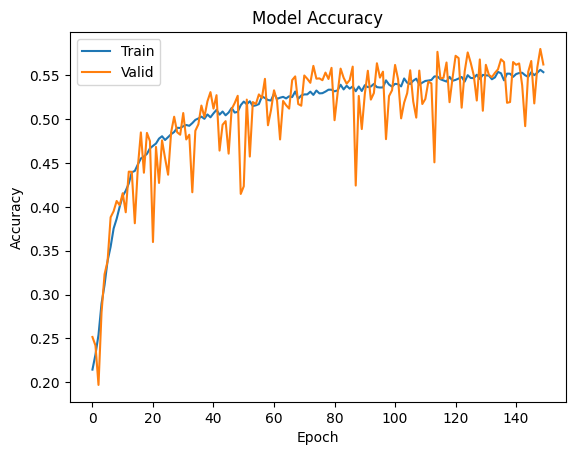

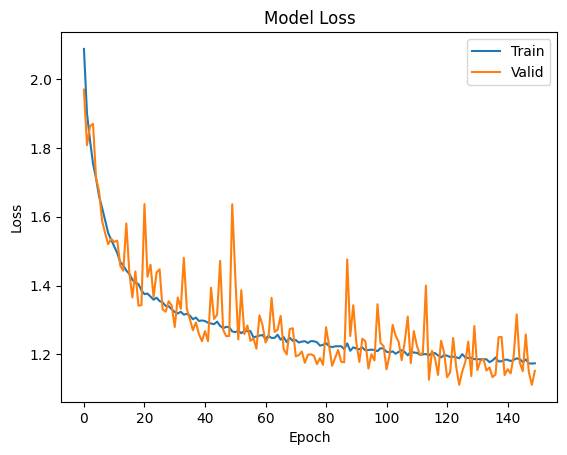

In [15]:
#plot
# Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
#Inference on a single image
class_labels = list(train_generator.class_indices.keys())

In [17]:
class_labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [19]:
import os

def predict_emotion(img_path):
    # Get actual class name from file path
    actual_label = os.path.basename(os.path.dirname(img_path))

    # Load and preprocess image
    img = image.load_img(img_path, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Display image with actual & predicted label
    plt.imshow(img_array[0].squeeze(), cmap='gray')
    plt.title(f"Actual: {actual_label.capitalize()} | Predicted: {predicted_label.capitalize()}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


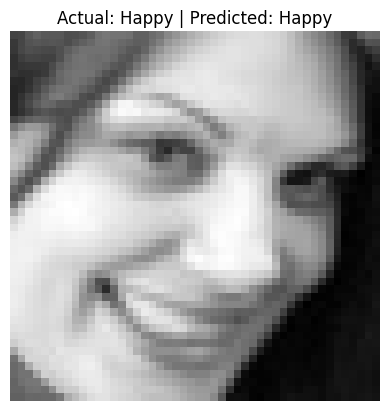

In [21]:
predict_emotion("/content/extracted_data/test/happy/PrivateTest_13103594.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


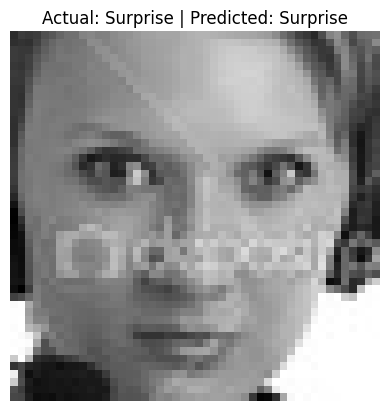

In [26]:
predict_emotion("/content/extracted_data/test/surprise/PrivateTest_13683211.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


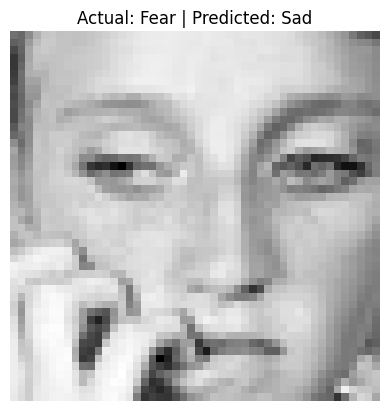

In [27]:
predict_emotion("/content/extracted_data/test/fear/PrivateTest_11014592.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


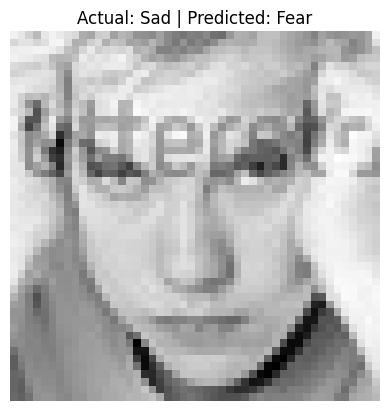

In [32]:
predict_emotion("/content/extracted_data/test/sad/PrivateTest_10814167.jpg")